### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [20]:
rating_data = pd.read_csv("rating.csv") 
movie_data = pd.read_csv("movie.csv")
user_data = pd.read_csv("user.csv")

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [21]:
print("Dataframe Info")
print("--------------")
print("Rating Info")
print("-----------")
rating_data.info()
print("**********************************************")
print()
print("Movie Info")
print("----------")
movie_data.info()
print("**********************************************")
print()
print("User Info")
print("-----------")
user_data.info()
print("**********************************************")
print()
print("Number of rows and columns in the dataframes")
print("--------------------------------------------")
print("(Rows,Columns) in rating dataframe: {}".format(rating_data.shape))
print("(Rows,Columns) in movie dataframe: {}".format(movie_data.shape))
print("(Rows,Columns) in user dataframe: {}".format(user_data.shape))
print("**********************************************")
print()
print("Dataframe description")
print("---------------------")
print("Rating")
print("------")
print(rating_data.describe())
print("**********************************************")
print()
print("Movie")
print("-----")
print(movie_data.describe())
print("**********************************************")
print()
print("User")
print("----")
print(user_data.describe())
print("**********************************************")
print("Missing Values")
print("---------------")
print("Rating")
print("------")
print(rating_data.isnull().sum())
print("**********************************************")
print()
print("Movie")
print("-----")
print(movie_data.isnull().sum())
print("**********************************************")
print()
print("User")
print("-----")
print(user_data.isnull().sum())

Dataframe Info
--------------
Rating Info
-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
**********************************************

Movie Info
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Child

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [22]:
column_list = list(movie_data) # get the list of columns from the dataframe
column_list.remove('movie id') # remove the movie id field from the list of columns
print(movie_data[column_list].sum(axis=0,numeric_only=True))

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


### 5. Drop the movie where the genre is unknown - 2.5 marks

In [23]:
movie_data.drop(movie_data[movie_data.unknown == 1].index,inplace=True) # inplace removal of movie with unknown genre
movie_data[movie_data.unknown == 1] # verify that the movie has been removed

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [24]:
column_list = list(movie_data) # get the list of columns from the dataframe

column_list.remove('movie id') # remove the movie id column 

if 'genre count' not in movie_data: # add a column with the sum of all genres for the movie
    movie_data.loc[:,'genre count'] = movie_data[column_list].sum(numeric_only=True, axis=1)

movie_data_more_than_one_genre=movie_data[movie_data['genre count'] > 1] # create a new dataframe with movies with more than one genre

print(movie_data_more_than_one_genre[['movie title', 'genre count']].to_string(index=False)) # print movie name with the number of genres for the movie

print("Total number of movies with more than one genre: {}".format(len(movie_data_more_than_one_genre.index)))

                                                           movie title  genre count
                                                            Toy Story             3
                                                            GoldenEye             3
                                                           Get Shorty             3
                                                              Copycat             3
                                                       Twelve Monkeys             2
                                                                 Babe             3
                                                          Richard III             2
                                                        Seven (Se7en)             2
                                                  Usual Suspects, The             2
                                                          Postino, Il             2
                                          French Twist (Gazon maudit)       

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [18]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


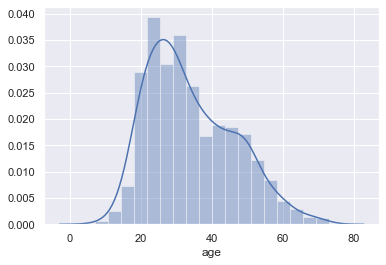

In [139]:
sns.distplot(user_data['age']); # distplot for age with Kernel Density Estimate

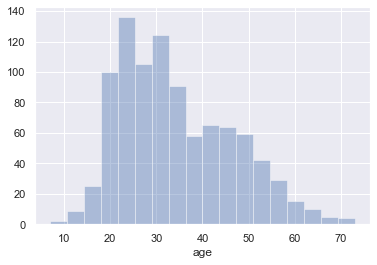

In [25]:
sns.distplot(user_data['age'], kde=False); # distplot for age without Kernel Density Estimate

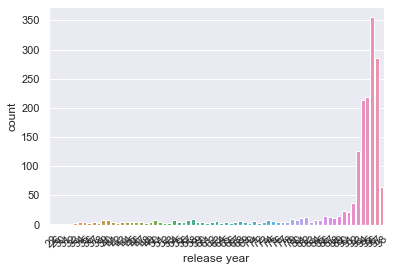

In [26]:
release_year = movie_data['release date'].str[-2:].rename("release year") # get the last 2 characters from the release year
plt.xticks(rotation=45)
sns.countplot(release_year); # countplot for release year

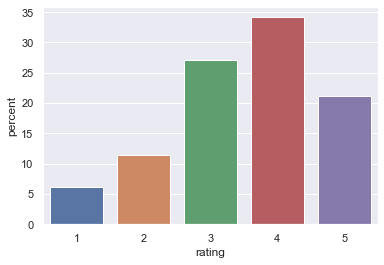

In [27]:
# Rating bar plot using the lambda and estimator approach
rating = rating_data['rating']
percentage = lambda i: len(i) / len(rating) * 100

rating_pct_plot = sns.barplot(x=rating, y=rating,  estimator=percentage);
rating_pct_plot.set(ylabel="percent")
plt.show()

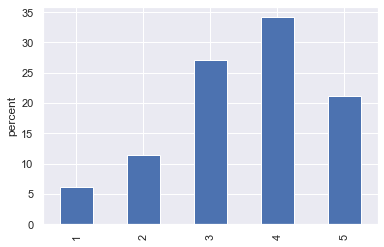

In [28]:
# Rating bar plot using the normalized value count approach
rating = rating_data['rating']

rating_pct_plot = (pd.Series(rating).value_counts(normalize=True, sort=False)*100).plot.bar()
rating_pct_plot.set(ylabel="percent")
plt.show()

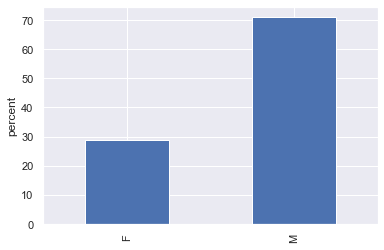

In [29]:
# Gender bar plot using the normalized value count approach
gender = user_data['gender']

gender_pct_plot = (pd.Series(gender).value_counts(normalize=True, sort=False)*100).plot.bar()
gender_pct_plot.set(ylabel="percent")
plt.show()

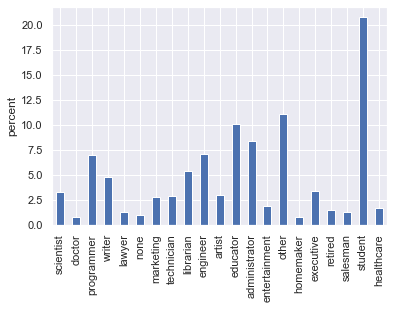

In [30]:
# Occupation bar plot using the normalized value count approach
occupation = user_data['occupation']
occupation_pct_plot = (pd.Series(occupation).value_counts(normalize=True, sort=False)*100).plot.bar()
occupation_pct_plot.set(ylabel="percent")
plt.show()


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

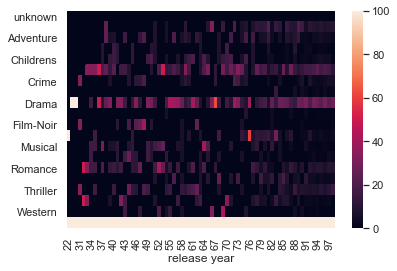

In [63]:
# create a copy of the movie data frame
movie_data_year_genre = movie_data.copy()  

# add the release_year series created earlier to the dataframe
if 'release year' not in movie_data_year_genre:  
    movie_data_year_genre['release year'] = release_year

# drop the non-relevant columns
movie_data_year_genre.drop(['movie id', 'movie title', 'release date','genre count'], axis = 1, inplace=True) 

# group by the release year and get the sum of all movies for the genre for the year
movie_data_year_genre = movie_data_year_genre.groupby('release year').sum() 

if 'total' not in movie_data_year_genre: # add a column with the sum of all genres for the year
    movie_data_year_genre.loc[:,'total'] = movie_data_year_genre.sum(axis=1)
movie_data_year_genre = (movie_data_year_genre.div(movie_data_year_genre['total'], axis= 0) * 100).round(2)

sns.heatmap(movie_data_year_genre.transpose()); # create the heat map


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [83]:
movie_rating = pd.merge(movie_data,rating_data,how="inner",on="movie id")[['movie title','rating']]
movie_rating = movie_rating.groupby("movie title").agg(rating_count=('rating', 'size'), average_rating=('rating', 'mean'))
print("Movies with count and average of ratings")
print("----------------------------------------")
print(movie_rating)

Movies with count and average of ratings
----------------------------------------
                                 rating_count  average_rating
movie title                                                  
'Til There Was You                          9        2.333333
1-900                                       5        2.600000
101 Dalmatians                            109        2.908257
12 Angry Men                              125        4.344000
187                                        41        3.024390
...                                       ...             ...
Young Guns                                101        3.207921
Young Guns II                              44        2.772727
Young Poisoner's Handbook, The             41        3.341463
Zeus and Roxanne                            6        2.166667
Á köldum klaka (Cold Fever)                 1        3.000000

[1657 rows x 2 columns]


In [88]:
movie_rating = movie_rating[movie_rating['rating_count'] > 100]
print("Movies with more than 100 ratings")
print("---------------------------------")
print(movie_rating)

Movies with more than 100 ratings
---------------------------------
                                        rating_count  average_rating
movie title                                                         
101 Dalmatians                                   109        2.908257
12 Angry Men                                     125        4.344000
2001: A Space Odyssey                            259        3.969112
Absolute Power                                   127        3.370079
Abyss, The                                       151        3.589404
...                                              ...             ...
Willy Wonka and the Chocolate Factory            326        3.631902
Wizard of Oz, The                                246        4.077236
Wrong Trousers, The                              118        4.466102
Young Frankenstein                               200        3.945000
Young Guns                                       101        3.207921

[334 rows x 2 columns]


In [93]:
movie_rating = movie_rating.sort_values(by='average_rating', ascending=False)
print("Movies sorted by average rating in descending order")
print("---------------------------------------------------")
print(movie_rating)

Movies sorted by average rating in descending order
---------------------------------------------------
                            rating_count  average_rating
movie title                                             
Close Shave, A                       112        4.491071
Schindler's List                     298        4.466443
Wrong Trousers, The                  118        4.466102
Casablanca                           243        4.456790
Shawshank Redemption, The            283        4.445230
...                                  ...             ...
Spawn                                143        2.615385
Event Horizon                        127        2.574803
Crash                                128        2.546875
Jungle2Jungle                        132        2.439394
Cable Guy, The                       106        2.339623

[334 rows x 2 columns]


In [102]:
print("Top 25 movies")
print("-------------")
print(movie_rating.head(25))

Top 25 movies
-------------
                                                    rating_count  \
movie title                                                        
Close Shave, A                                               112   
Schindler's List                                             298   
Wrong Trousers, The                                          118   
Casablanca                                                   243   
Shawshank Redemption, The                                    283   
Rear Window                                                  209   
Usual Suspects, The                                          267   
Star Wars                                                    583   
12 Angry Men                                                 125   
Citizen Kane                                                 198   
To Kill a Mockingbird                                        219   
One Flew Over the Cuckoo's Nest                              264   
Silence of the Lambs

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [137]:
movie_rating_user = pd.merge(pd.merge(movie_data,rating_data,how="inner",on="movie id"),user_data,how="inner",on="user id")

movie_rating_user.drop(['movie id', 'movie title', 'release date','genre count', 'age', 'timestamp','occupation','zip code','rating'], axis = 1, inplace=True)

movie_genre_by_gender = movie_rating_user.groupby(['user id','gender']).sum()

movie_genre_by_gender = movie_genre_by_gender.groupby('gender').sum()

if 'total' not in movie_genre_by_gender: # add a column with the sum of ratings for each gender
    movie_genre_by_gender.loc[:,'total'] = movie_genre_by_gender.sum(axis=1)
movie_genre_by_gender = (movie_genre_by_gender.div(movie_genre_by_gender['total'], axis= 0) * 100).round(2)

print(movie_genre_by_gender)
print("***************************************************")
print()
print("Percentage of users watching drama by gender:")
print(movie_genre_by_gender['Drama'])
print("=> The statement 'Men watch more drama than women' is false.")
print("***************************************************")
print()
print("Percentage of users watching Sci-Fi by gender:")
print(movie_genre_by_gender['Sci-Fi'])
print("=> The statement 'Women watch more Sci-Fi than men' is false.")
print("***************************************************")
print()
print("Percentage of users watching drama by gender:")
print(movie_genre_by_gender['Romance'])
print("=> The statement 'Men watch more Romance than women' is false.")

        unknown  Action  Adventure  Animation  Childrens  Comedy  Crime  \
gender                                                                    
F           0.0   10.13       5.85       1.85       4.16   15.02   3.34   
M           0.0   12.68       6.68       1.64       3.12   13.70   3.94   

        Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  \
gender                                                                     
F              0.35  20.50     0.68       0.72    2.23     2.69     2.45   
M              0.36  18.18     0.62       0.85    2.59     2.21     2.47   

        Romance  Sci-Fi  Thriller   War  Western  total  
gender                                                   
F         10.91    4.90      9.47  4.08     0.69  100.0  
M          8.56    6.36     10.56  4.54     0.93  100.0  
***************************************************

Percentage of users watching drama by gender:
gender
F    20.50
M    18.18
Name: Drama, dtype: float64
=> The